<a href="https://colab.research.google.com/github/upparasudharani/Diabetes-prediction/blob/main/Roc_Multiclass_3stages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.simplefilter(action = "ignore")
df = pd.read_excel("/content/drive/MyDrive/Patient Data/dataset_DN.xlsx")
df
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      519 non-null    int64  
 1   Age     519 non-null    int64  
 2   Gender  519 non-null    object 
 3   BU      508 non-null    float64
 4   SCr     519 non-null    float64
 5   HbA1c   504 non-null    float64
 6   Class   519 non-null    object 
 7   eGFR    519 non-null    float64
 8   Stages  519 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 36.6+ KB


In [3]:
for i in range(len(df['Stages'])):
  if df.Stages[i]=='Stage I':
    df.Stages[i]=1
  elif df.Stages[i]=='Stage II':
    df.Stages[i]=2
  elif df.Stages[i]=='Stage III':
    df.Stages[i]=3
  elif df.Stages[i]=='Stage IV':
    df.Stages[i]=4
  else:
    df.Stages[i]=5
df['Stages']=df['Stages'].factorize()[0].astype(float)

In [4]:
#Replace categorical values with numbers
df['Gender'].value_counts()
categories = {"male":0, "female":1}
df['Gender']=df['Gender'].factorize()[0].astype('float')
df['Gender'] = df['Gender'].replace(categories)
df['Class'].value_counts()

categories = {"DN":0, "non-DN":1}
df['Class']=df['Class'].factorize()[0].astype(float)
df['Class'] = df['Class'].replace(categories)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [7]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [8]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [9]:
#Multiclass classification evaluation with KS test
#Creating a synthetic dataset
scale = 3.5
size = 500

In [10]:
class1_x = np.random.normal(loc = 10, scale = scale, size = size)
class1_y = np.random.normal(loc = 1, scale = scale, size = size)

In [11]:
class2_x = np.random.normal(loc = 1, scale = scale, size = size)
class2_y = np.random.normal(loc = 5, scale = scale, size = size)

In [12]:

class3_x = np.random.normal(loc = 10, scale = scale, size = size)
class3_y = np.random.normal(loc = 10, scale = scale, size = size)

In [13]:
class4_x = np.random.normal(loc = 10, scale = scale, size = size)
class4_y = np.random.normal(loc = 10, scale = scale, size = size)

In [14]:
class5_x = np.random.normal(loc = 10, scale = scale, size = size)
class5_y = np.random.normal(loc = 10, scale = scale, size = size)

In [23]:
df_class1 = pd.DataFrame({'x' : class1_x, 'y' : class1_y, 'Stages': 'Stage I'})
df_class2 = pd.DataFrame({'x' : class2_x, 'y' : class2_y, 'Stages': 'Stage II'})
df_class3 = pd.DataFrame({'x' : class3_x, 'y' : class3_y, 'Stages': 'Stage III'})
df_class4 = pd.DataFrame({'x' : class4_x, 'y' : class4_y, 'Stages': 'Stage IV'})
df_class5 = pd.DataFrame({'x' : class5_x, 'y' : class5_y, 'Stages': 'ESRD'})
df = df_class1.append(df_class2,ignore_index = True)
df = df.append(df_class3, ignore_index = True)
#df = df_class3.append(df_class4, ignore_index = True)
#df = df.append(df_class5, ignore_index = True)

In [24]:
df_class1.info()
df_class2.info()
df_class3.info()
df_class4.info()
df_class5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
 2   Stages  500 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
 2   Stages  500 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
 2   Stages  500 non-null    object 
dtypes: float64(2), object(

<Axes: xlabel='x', ylabel='y'>

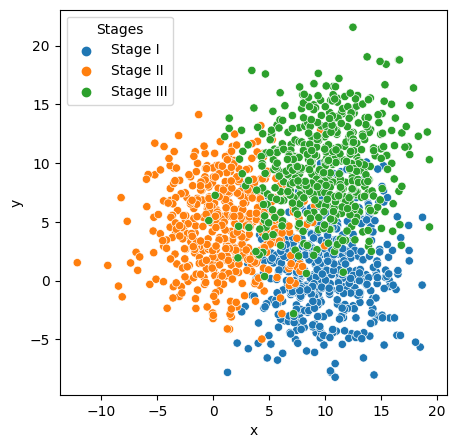

In [25]:
# Plot them to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'x', y = 'y', hue = 'Stages', data = df)

In [26]:
X = df[['x', 'y']]
y = df['Stages']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
#Fits the model and make the predictions
model_multiclass = RandomForestClassifier(n_estimators = 50, criterion = 'gini')
model_multiclass.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [28]:
y_pred = model_multiclass.predict(X_test)
y_proba = model_multiclass.predict_proba(X_test)

In [29]:
classes = model_multiclass.classes_
classes

array(['Stage I', 'Stage II', 'Stage III'], dtype=object)

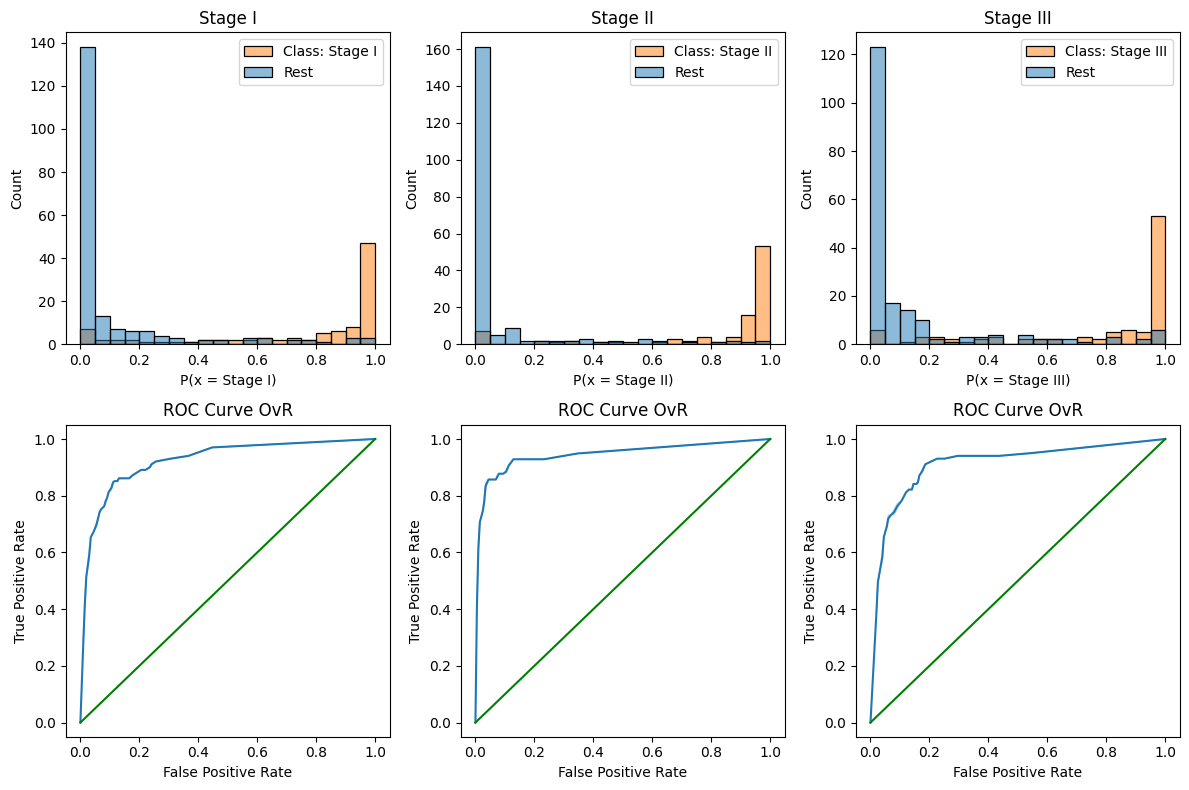

In [30]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()